In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
col = ['petal_length', 'petal_width']
X = df.loc[:,col]

In [5]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

# SVC Classification

In [6]:
C= 1.0
clf = svm.SVC(kernel= 'linear', C= C)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
clf.predict([[6,2]])

array([2], dtype=int64)

In [8]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

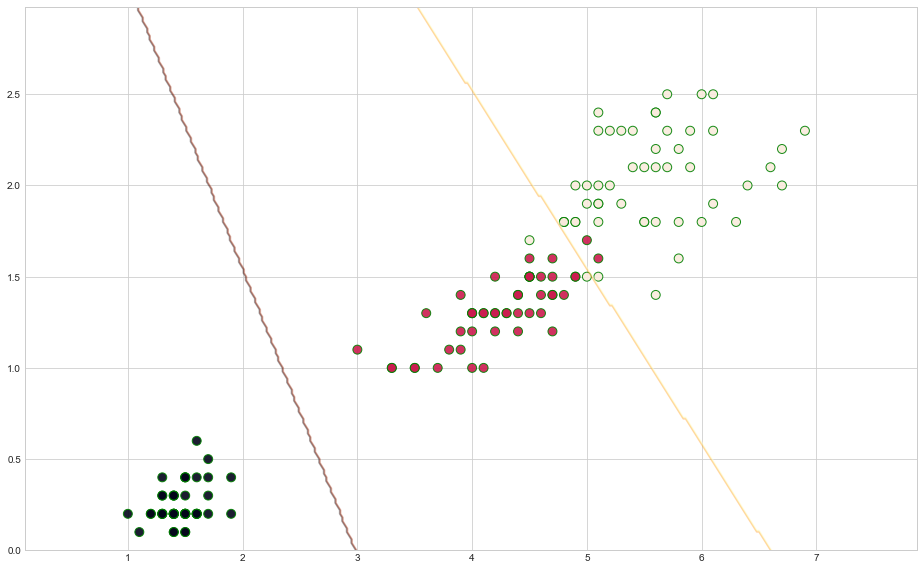

In [9]:
z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (16,10))
ax = plt.contour(xx, yy, z, cmap = 'afmhot', alpha = 0.3)
plt.scatter(X.values[:,0], X.values[:,1], c = y, s=80, alpha = 0.9, edgecolors= 'g')

# Trying with C= 0.001

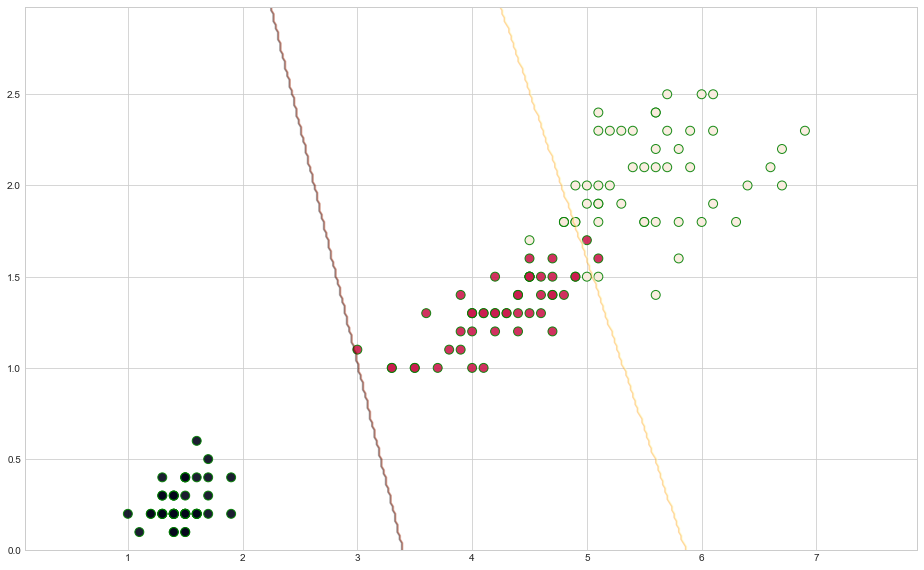

In [10]:
C= 0.001
clf = svm.SVC(kernel= 'linear', C= C)
clf.fit(X,y)
clf.predict([[6,2]])
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (16,10))
ax = plt.contour(xx, yy, z, cmap = 'afmhot', alpha = 0.3)
plt.scatter(X.values[:,0], X.values[:,1], c = y, s=80, alpha = 0.9, edgecolors= 'g')

# Linear SVM Implementation

In [11]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:,col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

C:\Users\Sayan Sarkar\Anaconda3\envs\irisproject\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Standard Scaling

In [12]:
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)

## Fitting the model

In [13]:
C= 1.0
clf = svm.SVC(kernel= 'linear', C= C)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Cross validation within train set

In [16]:
res = cross_val_score(clf, X_train_scaled, y_train, cv = 10, scoring = 'accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Average SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9501
Average SD: 		 0.0538


In [17]:
y_train_pred = cross_val_predict(clf, X_train_scaled, y_train, cv = 3)
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]], dtype=int64)

In [19]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, y_train_pred, average = 'weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train, y_train_pred, average = 'weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train, y_train_pred, average = 'weighted')))

Precision Score: 	 0.9500
Recall Score: 		 0.9500
F1 Score: 		 0.9500


## Cross validation within test set

In [20]:
X_test_scaled = scaled.fit_transform(X_test)
y_test_pred = cross_val_predict(clf, X_test_scaled, y_test, cv =3)

In [21]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [22]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, y_test_pred, average = 'weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test, y_test_pred, average = 'weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test, y_test_pred, average = 'weighted')))

Precision Score: 	 0.9422
Recall Score: 		 0.9333
F1 Score: 		 0.9290


# Polynomial Kernel

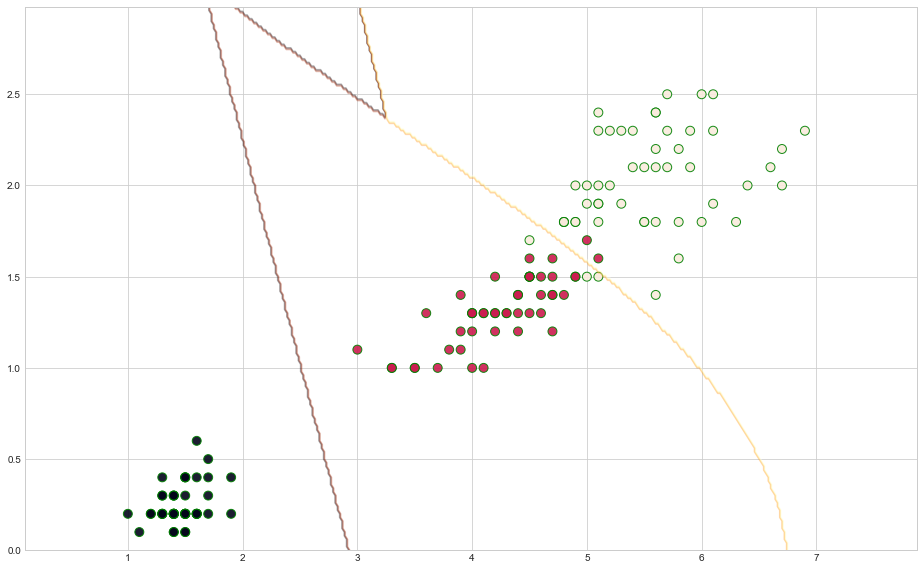

In [23]:
C= 1.0
clf = svm.SVC(kernel= 'poly',degree = 3,C= C)
clf.fit(X,y)
clf.predict([[6,2]])
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (16,10))
ax = plt.contour(xx, yy, z, cmap = 'afmhot', alpha = 0.3)
plt.scatter(X.values[:,0], X.values[:,1], c = y, s=80, alpha = 0.9, edgecolors= 'g')

# Polynomial SVM Implementation

In [24]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:,col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
C= 1.0
clf = svm.SVC(kernel= 'poly',degree = 3, C= C)
clf.fit(X,y)

C:\Users\Sayan Sarkar\Anaconda3\envs\irisproject\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Cross validation within train set

In [25]:
res = cross_val_score(clf, X_train_scaled, y_train, cv = 10, scoring = 'accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Average SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9524
Average SD: 		 0.0712


In [26]:
y_train_pred = cross_val_predict(clf, X_train_scaled, y_train, cv = 3)
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  6, 38]], dtype=int64)

In [27]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, y_train_pred, average = 'weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train, y_train_pred, average = 'weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train, y_train_pred, average = 'weighted')))

Precision Score: 	 0.9570
Recall Score: 		 0.9500
F1 Score: 		 0.9500


## Cross validation within test set

In [28]:
X_test_scaled = scaled.fit_transform(X_test)
y_test_pred = cross_val_predict(clf, X_test_scaled, y_test, cv =3)
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  3,  3]], dtype=int64)

In [29]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, y_test_pred, average = 'weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test, y_test_pred, average = 'weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test, y_test_pred, average = 'weighted')))

Precision Score: 	 0.9187
Recall Score: 		 0.9000
F1 Score: 		 0.8885


# Gaussian Radial Basis Function(rbf)

In [30]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:,col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
C= 1.0
clf = svm.SVC(kernel= 'rbf', gamma = 0.7, C= C)
clf.fit(X,y)

C:\Users\Sayan Sarkar\Anaconda3\envs\irisproject\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Cross validation within train set

In [31]:
res = cross_val_score(clf, X_train_scaled, y_train, cv = 10, scoring = 'accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Average SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9501
Average SD: 		 0.0538


In [32]:
y_train_pred = cross_val_predict(clf, X_train_scaled, y_train, cv = 3)
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]], dtype=int64)

In [33]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, y_train_pred, average = 'weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train, y_train_pred, average = 'weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train, y_train_pred, average = 'weighted')))

Precision Score: 	 0.9586
Recall Score: 		 0.9583
F1 Score: 		 0.9584


## Cross validation within test set

In [67]:
X_test_scaled = scaled.fit_transform(X_test)
y_test_pred = cross_val_predict(clf, X_test_scaled, y_test, cv =3)
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [68]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, y_test_pred, average = 'weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test, y_test_pred, average = 'weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test, y_test_pred, average = 'weighted')))

Precision Score: 	 0.9422
Recall Score: 		 0.9333
F1 Score: 		 0.9290
